# Unsupervised Clustering Techniques

%pip install -r requirements.txt

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import scipy
import mpl_toolkits.mplot3d.axes3d as axes3d
from matplotlib.pyplot import legend
#Warning
import warnings
warnings.filterwarnings('ignore')
#Importint the module we created
import unsp_algorithms as unsp

### Dataset

In [2]:
data = pd.read_csv('MatrizdeFrecuenciaVectorizer_Stemming_Word.csv')
label_super=data['clase_cluster']
data.drop(['clase_cluster'], axis=1, inplace=True)
data=unsp.normalize(data)
data

,adecu,adult,aere,aeropuert,alejandr,alter,am,ambulatori,amplitud,anatom,...,siluet,taman,tej,telefon,telefonos,traque,universitari,vasculatur,vered,via
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.866892,...,0.000000,0.000000,0.000000,0.866892,0.000000,0.660564,0.866892,0.00000,0.000000,0.000000
1,0.779393,0.000000,0.000000,0.000000,0.527316,0.400576,0.651885,0.0,0.0,0.620668,...,0.000000,0.000000,0.499833,0.620668,0.000000,0.472944,0.620668,0.00000,0.000000,0.000000
2,0.000000,0.000000,0.773991,0.000000,0.000000,0.000000,0.296501,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.564606,0.000000,0.000000,0.564606,0.00000,0.000000,0.778436
3,0.492174,0.000000,0.000000,0.000000,0.665983,0.505914,0.411655,0.0,0.0,0.783884,...,0.000000,0.000000,0.631273,0.783884,0.000000,0.597312,0.783884,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.430117,0.000000,0.000000,0.000000,0.659078,0.0,0.0,0.000000,...,0.372184,0.328822,0.000000,0.627517,0.000000,0.478163,0.627517,0.00000,0.000000,0.432587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,0.000000,0.609140,0.000000,0.757576,0.000000,0.000000,0.613539,0.0,0.0,0.000000,...,0.346468,0.306102,0.000000,0.000000,0.757576,0.445124,0.000000,0.00000,0.757576,0.402697
802,0.000000,0.564260,0.000000,0.701759,0.000000,0.000000,0.284168,0.0,0.0,0.000000,...,0.320940,0.283549,0.000000,0.000000,0.701759,0.412328,0.000000,0.68817,0.701759,0.373027
803,0.000000,0.613683,0.000000,0.763226,1.000000,0.379825,0.618116,0.0,0.0,0.588516,...,0.000000,0.000000,0.473940,0.000000,0.763226,0.448444,0.000000,0.00000,0.763226,0.405701
804,0.000000,0.000000,0.000000,0.907270,0.000000,0.000000,0.367386,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.907270,0.533079,0.000000,0.00000,0.907270,0.482269


## Aprendizaje 2

Aprender los datos usando tecnicas de agrupamiento en el espacio reducido generado por embebimientos

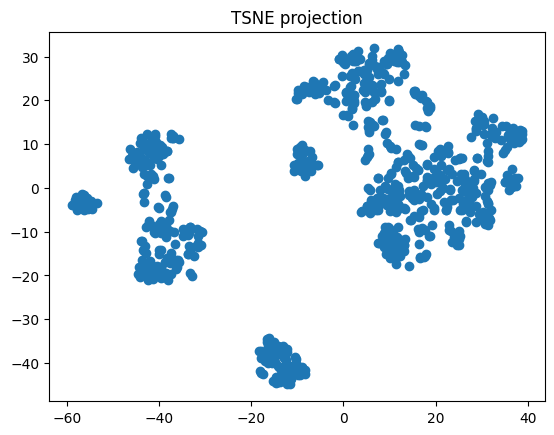

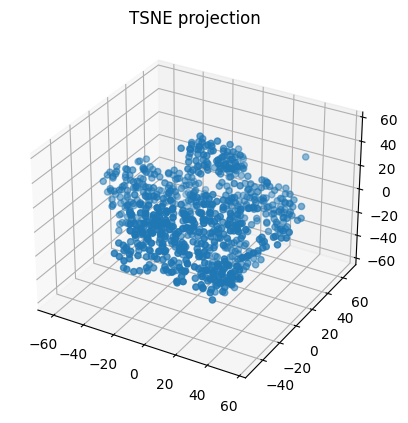

In [4]:
#Generación del espacio reducido usando UMAP
data_r2=unsp.tsne_manifold(data, 2, 30, 200)
data_r3=unsp.tsne_manifold(data, 3, 30, 200)

##### k-means algorithm

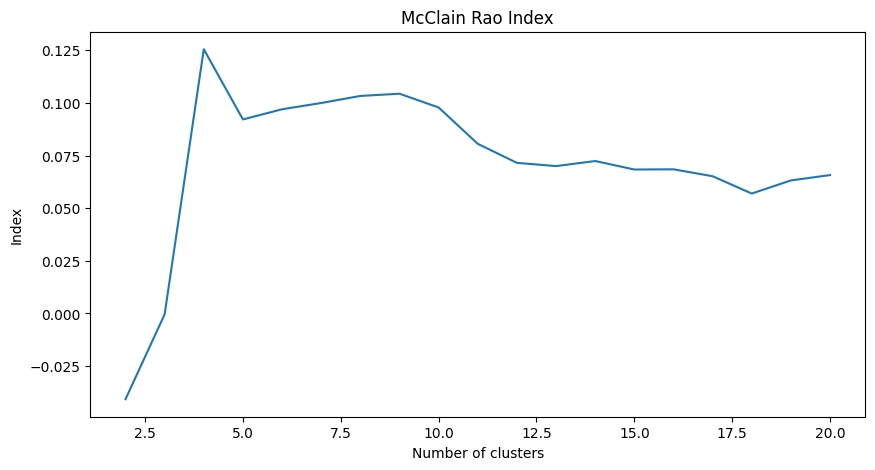

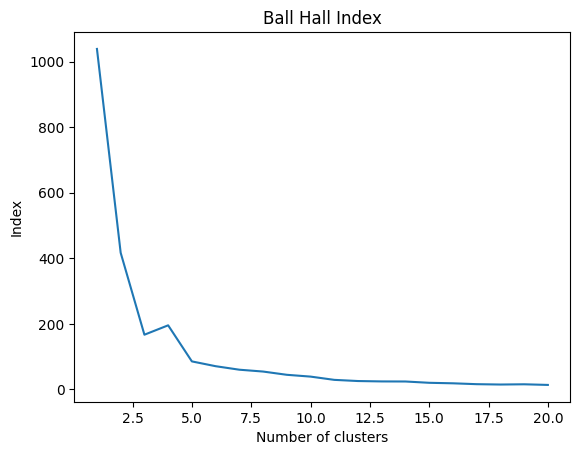

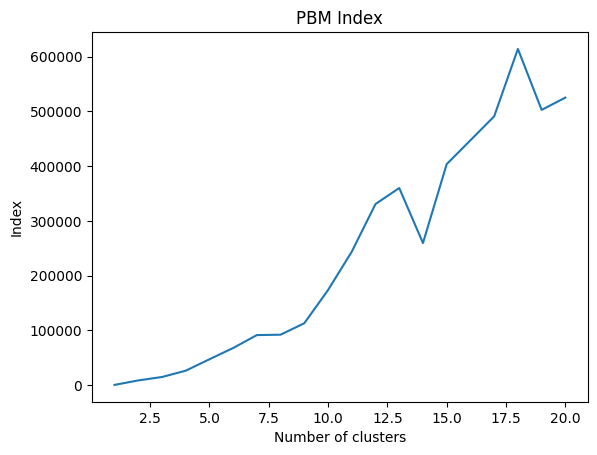

In [5]:
#Fiding the best number of clusters using the elbow method with different metrics
ks=np.linspace(1,20,20)
McClainRidx=[]
BallHallIdx=[]
PBM_idx=[]
for k in ks:
    centroids, clusters, cost = unsp.kmeans(data_r2, int(k), metric='euclidean')
    M,B,P=unsp.calcIndices(data_r2, clusters)
    McClainRidx.append(M)
    BallHallIdx.append(B)
    PBM_idx.append(P)


#Plotting the results
plt.figure(figsize=(10,5))
plt.plot(ks, McClainRidx, label='McClain Rao Index')
plt.title('McClain Rao Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()
plt.plot(ks, BallHallIdx, label='Ball Hall Index')
plt.title('Ball Hall Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()
plt.plot(ks, PBM_idx, label='PBM Index')
plt.title('PBM Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()


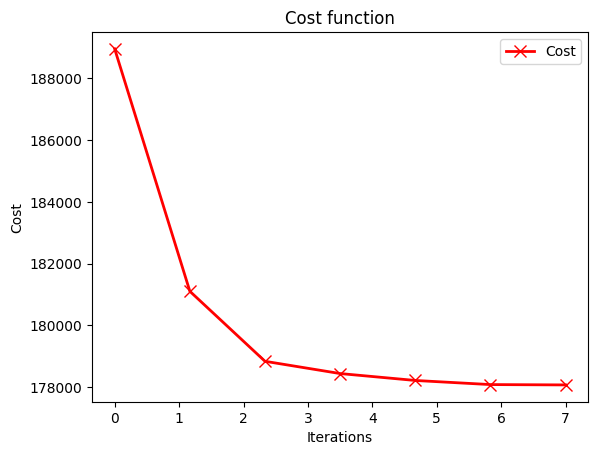

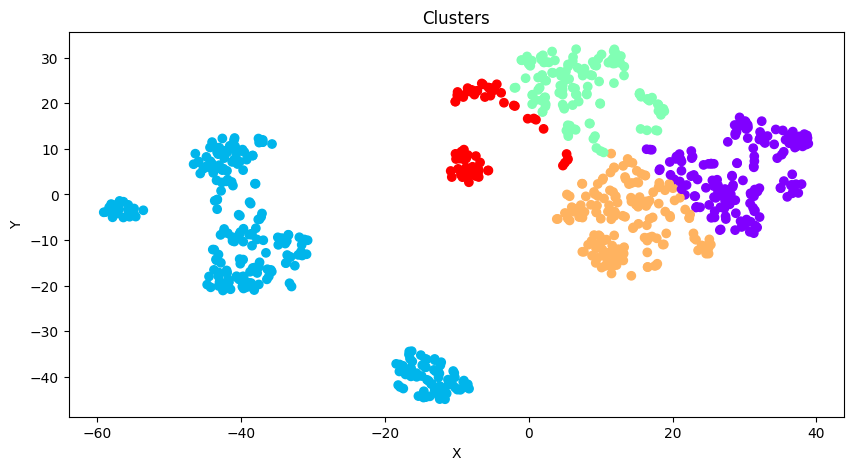

In [6]:
centroids, clusters, cost =unsp.kmeans(data_r2, 5, metric='euclidean')
plt.plot(np.linspace(0,len(cost),len(cost)),cost, 'bx-', color='red', label='Cost', linewidth=2, markersize=8)
plt.title('Cost function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

#Plotting the clusters
plt.figure(figsize=(10,5))
plt.scatter(data_r2[:,0], data_r2[:,1], c=clusters, cmap='rainbow')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


##### Fuzzy-c means algorithm

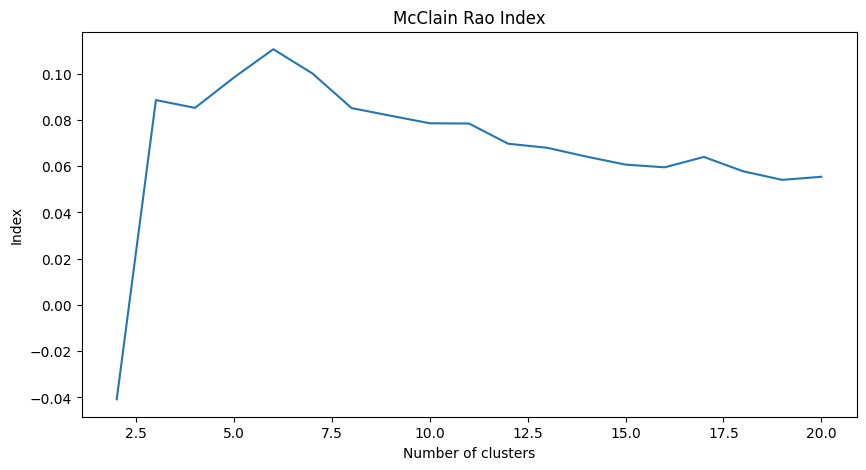

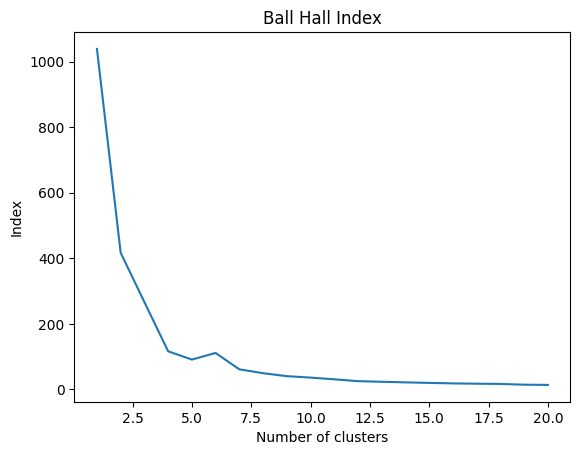

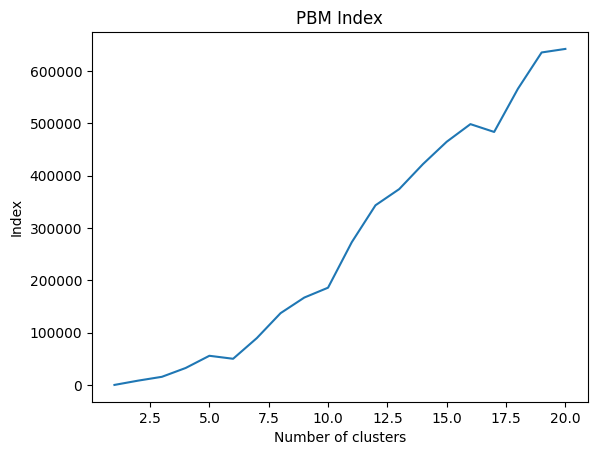

In [7]:
#Fiding the best number of clusters using the elbow method with different metrics
ks=np.linspace(1,20,20)
McClainRidx=[]
BallHallIdx=[]
PBM_idx=[]
for k in ks:
    centroids, U, cost= unsp.fuzzy_cmeans(data_r2, int(k), 2, 0.001)
    clusters=np.argmax(U, axis=1)
    M,B,P=unsp.calcIndices(data_r2, clusters)
    McClainRidx.append(M)
    BallHallIdx.append(B)
    PBM_idx.append(P)


#Plotting the results
plt.figure(figsize=(10,5))
plt.plot(ks, McClainRidx, label='McClain Rao Index')
plt.title('McClain Rao Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()
plt.plot(ks, BallHallIdx, label='Ball Hall Index')
plt.title('Ball Hall Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()
plt.plot(ks, PBM_idx, label='PBM Index')
plt.title('PBM Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()

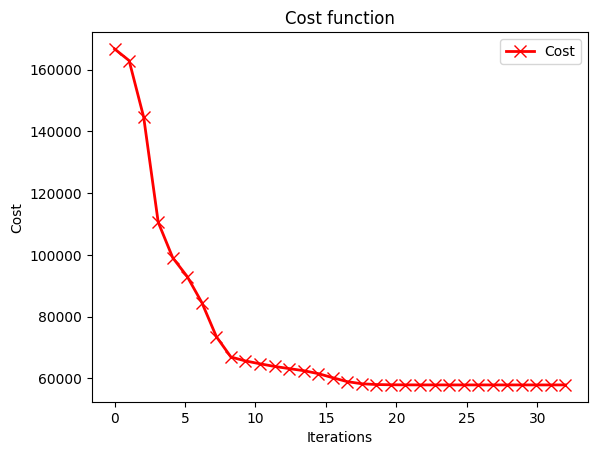

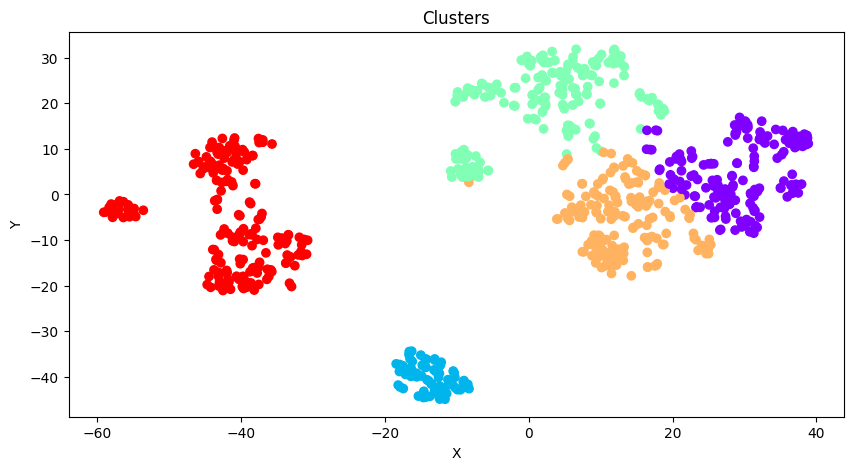

In [8]:
centroids, U, cost= unsp.fuzzy_cmeans(data_r2, 5, 2, 0.001)
clusters=np.argmax(U, axis=1)
plt.plot(np.linspace(0,len(cost),len(cost)),cost, 'bx-', color='red', label='Cost', linewidth=2, markersize=8)
plt.title('Cost function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()


#Plotting the clusters
plt.figure(figsize=(10,5))
plt.scatter(data_r2[:,0], data_r2[:,1], c=clusters, cmap='rainbow')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

##### Mountain clustering

Cluster  1  center:  [0.6, 0.6]
Cluster  1  center:  [0.6, 0.6]
Cluster  2  center:  [0.6, 0.7]
Cluster  1  center:  [0.6, 0.6]
Cluster  2  center:  [0.6, 0.7]
Cluster  3  center:  [0.7, 0.7]
Cluster  1  center:  [0.6, 0.6]
Cluster  2  center:  [0.6, 0.7]
Cluster  3  center:  [0.7, 0.7]
Cluster  4  center:  [0.6, 0.8]
Cluster  1  center:  [0.6, 0.6]
Cluster  2  center:  [0.6, 0.7]
Cluster  3  center:  [0.7, 0.7]
Cluster  4  center:  [0.6, 0.8]
Cluster  5  center:  [0.7, 0.8]
Cluster  1  center:  [0.6, 0.6]
Cluster  2  center:  [0.6, 0.7]
Cluster  3  center:  [0.7, 0.7]
Cluster  4  center:  [0.6, 0.8]
Cluster  5  center:  [0.7, 0.8]
Cluster  6  center:  [0.6, 0.9]
Cluster  1  center:  [0.6, 0.6]
Cluster  2  center:  [0.6, 0.7]
Cluster  3  center:  [0.7, 0.7]
Cluster  4  center:  [0.6, 0.8]
Cluster  5  center:  [0.7, 0.8]
Cluster  6  center:  [0.6, 0.9]
Cluster  7  center:  [0.7, 0.9]
Cluster  1  center:  [0.6, 0.6]
Cluster  2  center:  [0.6, 0.7]
Cluster  3  center:  [0.7, 0.7]
Cluster 

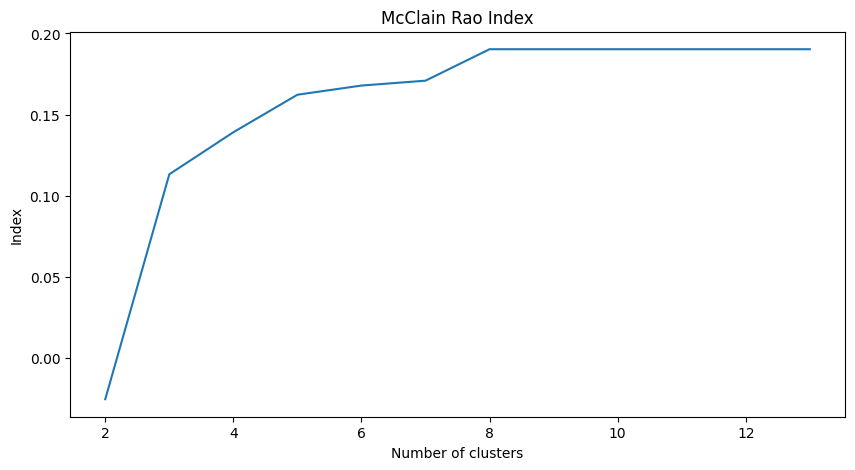

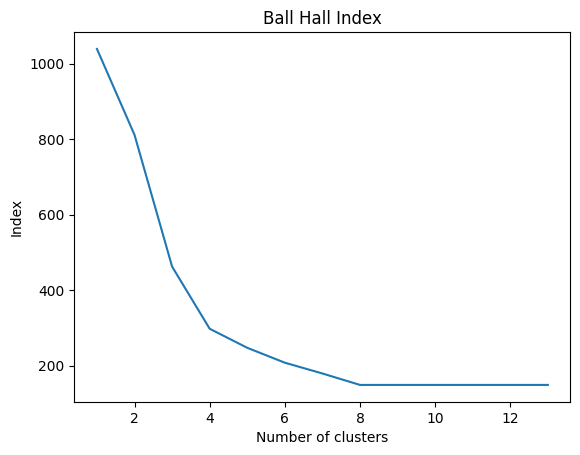

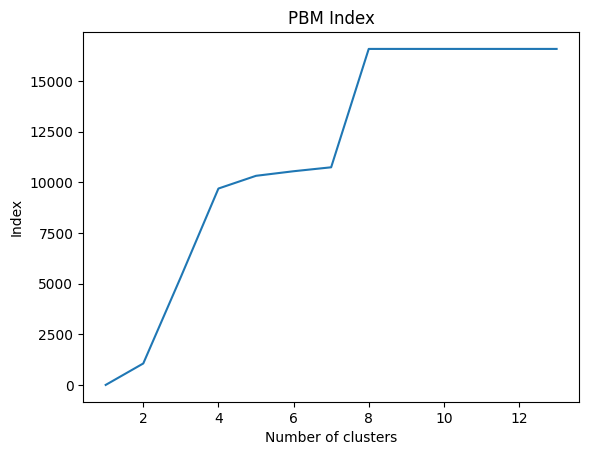

In [15]:
#Fiding the best number of clusters using the elbow method with different metrics
ks=np.linspace(1,13,13)
McClainRidx=[]
BallHallIdx=[]
PBM_idx=[]
n=2
gr=10

sigma=[0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
data_r2_n=unsp.normalize(data_r2)

for k in ks:
    clusters,center=unsp.mountain_clustering(n,gr,data_r2_n,sigma,int(k))
    M,B,P=unsp.calcIndices(data_r2, clusters)
    McClainRidx.append(M)
    BallHallIdx.append(B)
    PBM_idx.append(P)


#Plotting the results
plt.figure(figsize=(10,5))
plt.plot(ks, McClainRidx, label='McClain Rao Index')
plt.title('McClain Rao Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()
plt.plot(ks, BallHallIdx, label='Ball Hall Index')
plt.title('Ball Hall Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()
plt.plot(ks, PBM_idx, label='PBM Index')
plt.title('PBM Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()

Cluster  1  center:  [0.6, 0.6]
Cluster  2  center:  [0.6, 0.7]
Cluster  3  center:  [0.7, 0.7]
Cluster  4  center:  [0.6, 0.8]
Cluster  5  center:  [0.7, 0.8]
Cluster  6  center:  [0.6, 0.9]
Cluster  7  center:  [0.7, 0.9]
Cluster  8  center:  [0.8, 0.9]


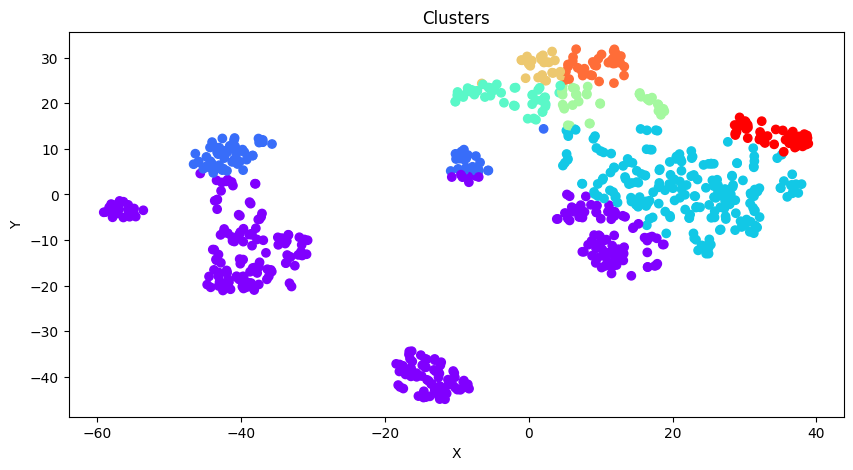

In [16]:
n=2
gr=10
kn=8
sigma = [0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
data_r2_n=unsp.normalize(data_r2)
clusters,center=unsp.mountain_clustering(n,gr,data_r2_n,sigma,kn)


#Plotting the clusters
plt.figure(figsize=(10,5))
plt.scatter(data_r2[:,0], data_r2[:,1], c=clusters, cmap='rainbow')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


##### Substractive Algorithm

In [17]:
#Transform  data_r2 to dataframe
data_r2_df=pd.DataFrame(data_r2, columns=['X','Y'])

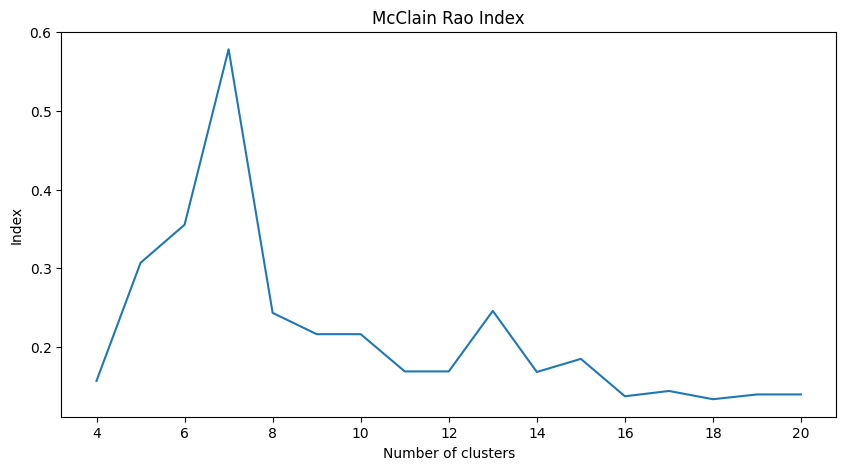

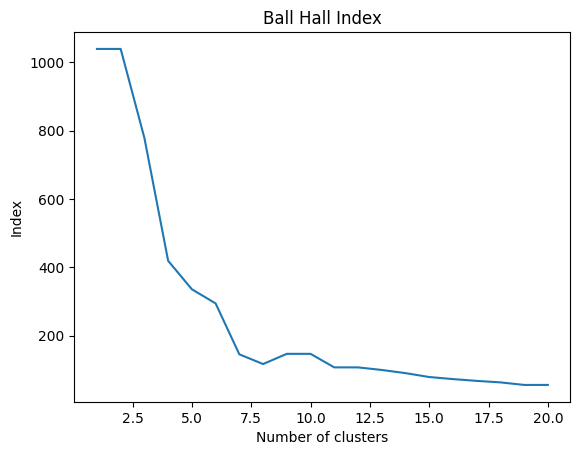

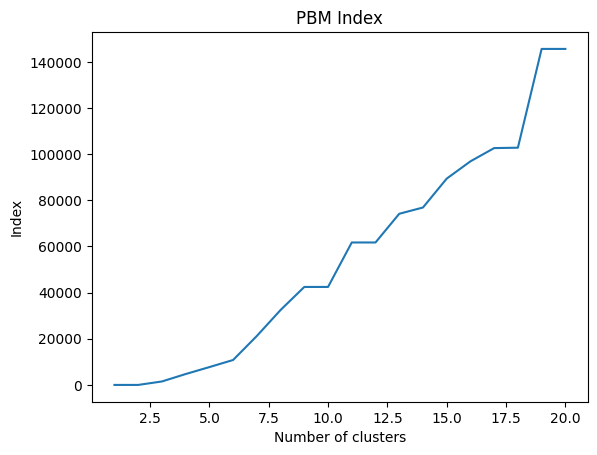

In [18]:
r_a=0.1
r_b=1.5*r_a

ks=np.linspace(1,20,20)
McClainRidx=[]
BallHallIdx=[]
PBM_idx=[]
for k in ks:
    clusters,centers=unsp.subtractive_clustering(r_a,r_b,data_r2_df,int(k))
    M,B,P=unsp.calcIndices(data_r2_df.values, clusters)
    McClainRidx.append(M)
    BallHallIdx.append(B)
    PBM_idx.append(P)


#Plotting the results
plt.figure(figsize=(10,5))
plt.plot(ks, McClainRidx, label='McClain Rao Index')
plt.title('McClain Rao Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()
plt.plot(ks, BallHallIdx, label='Ball Hall Index')
plt.title('Ball Hall Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()
plt.plot(ks, PBM_idx, label='PBM Index')
plt.title('PBM Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()

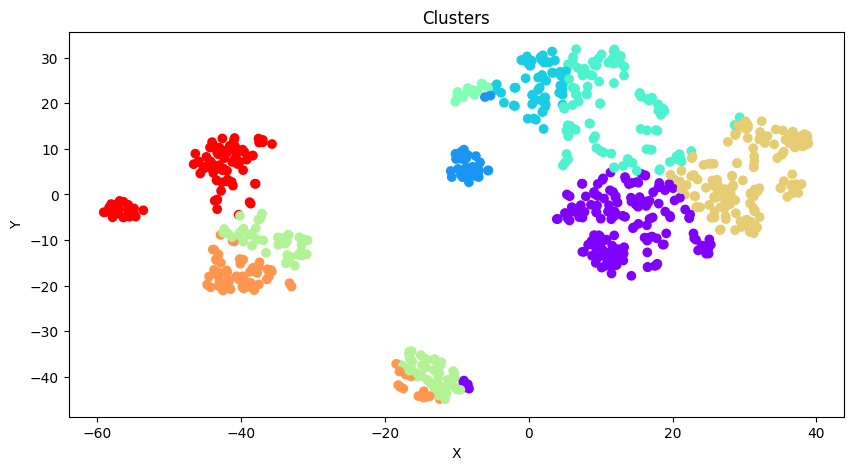

In [19]:
r_a=0.1
r_b=1.5*r_a
clusters,centers=unsp.subtractive_clustering(r_a,r_b,data_r2_df,12)


#Plotting the clusters
plt.figure(figsize=(10,5))
plt.scatter(data_r2[:,0], data_r2[:,1], c=clusters, cmap='rainbow')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

##### Agglomerative clustering

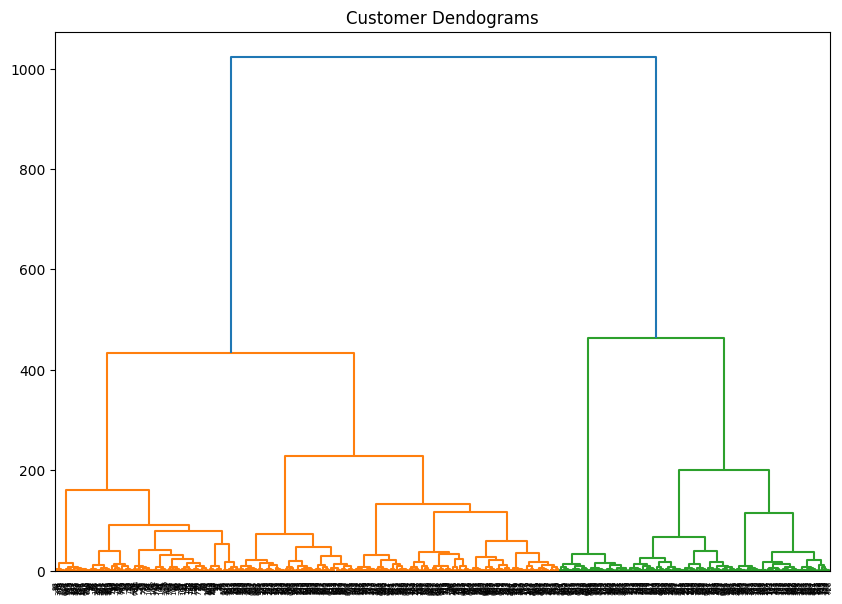

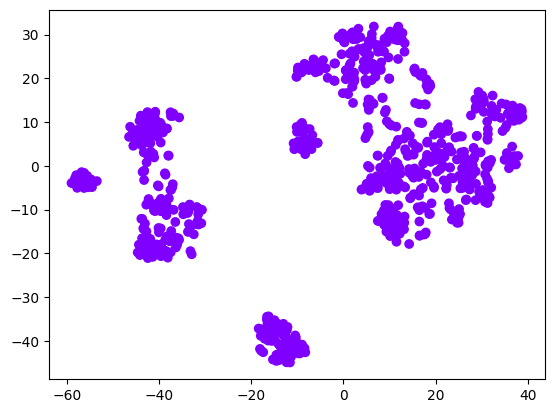

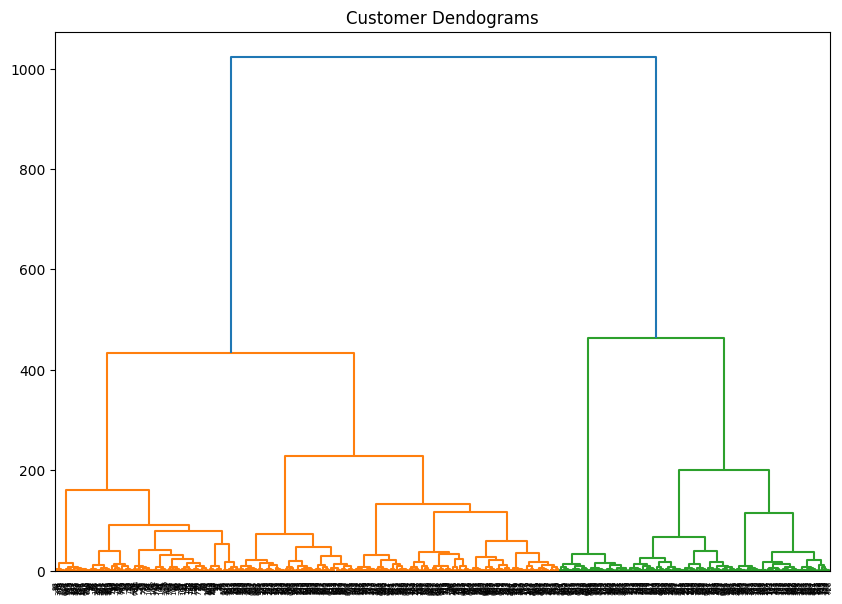

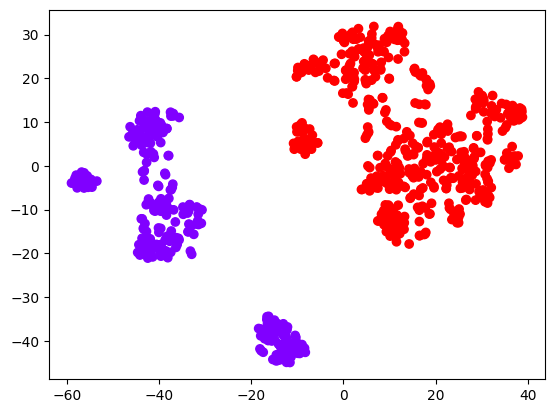

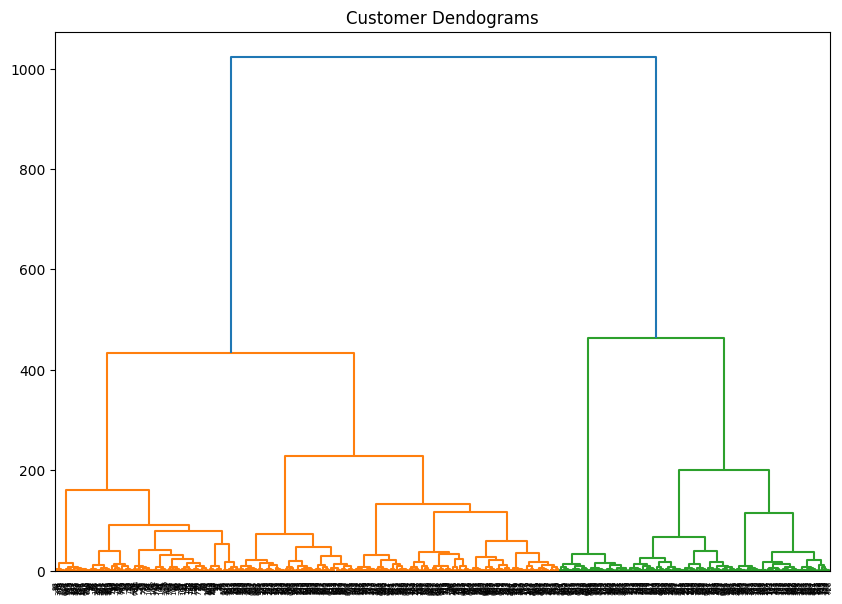

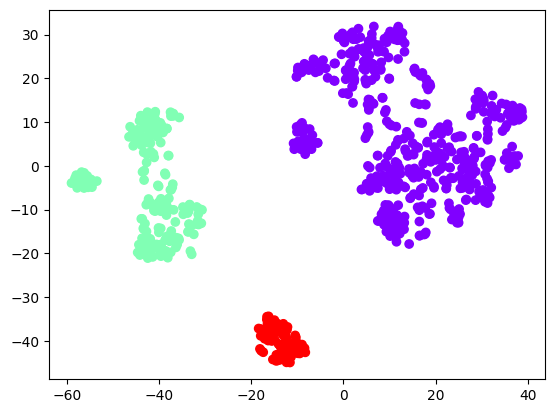

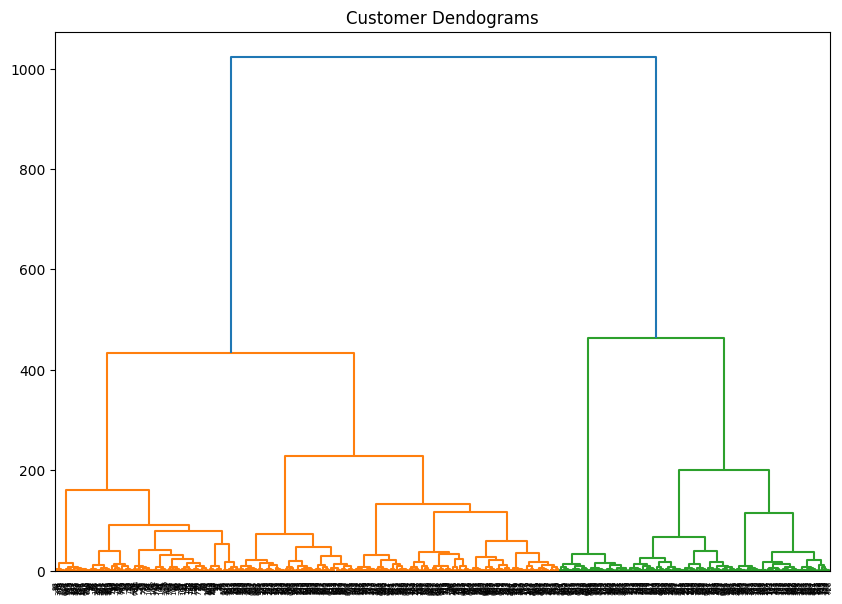

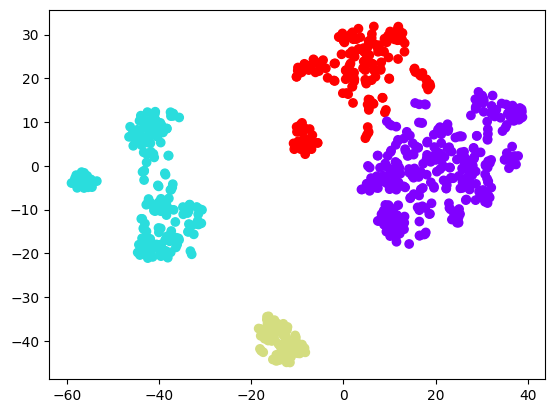

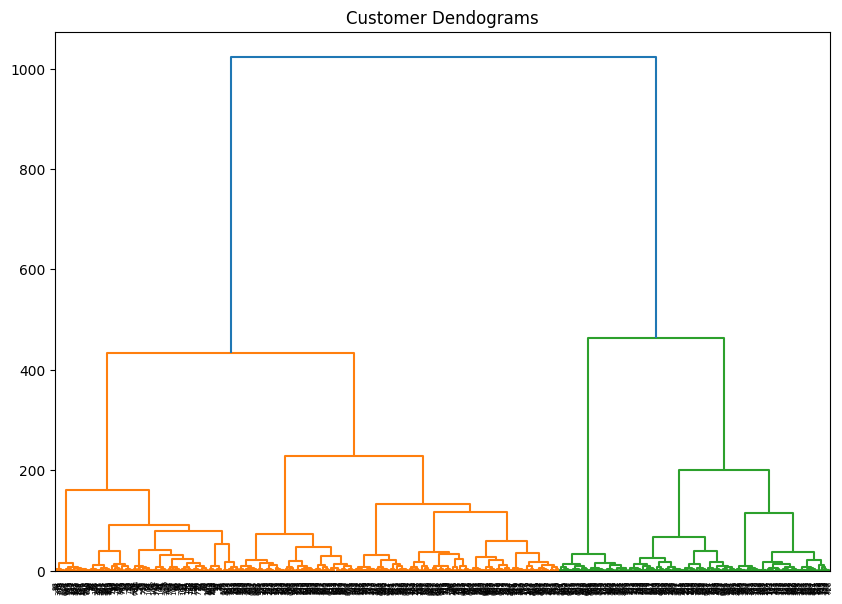

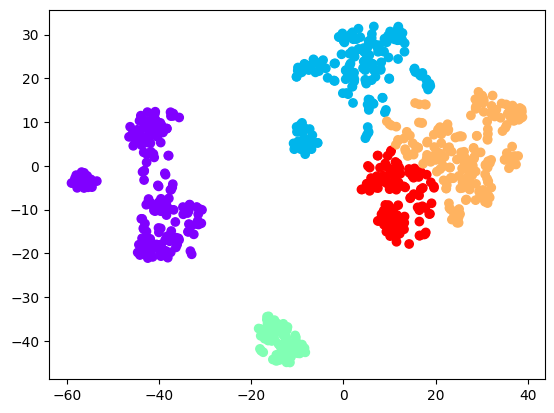

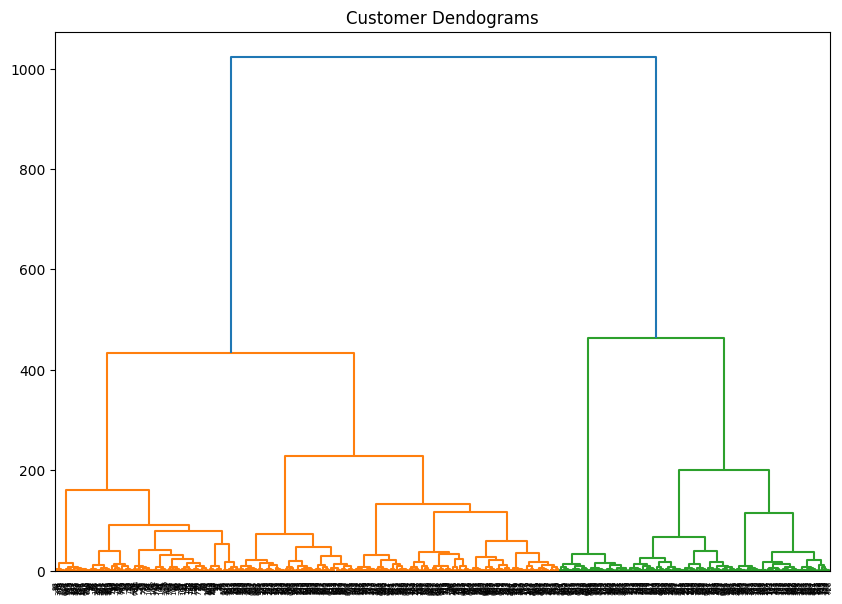

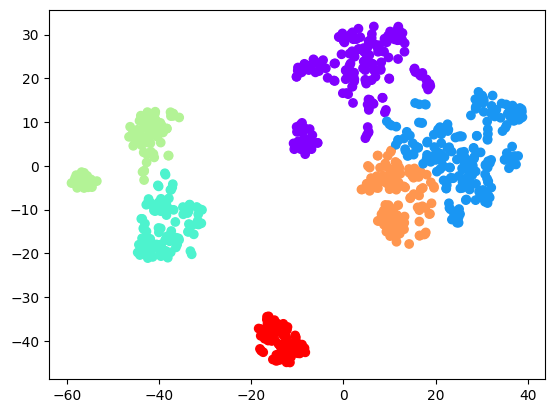

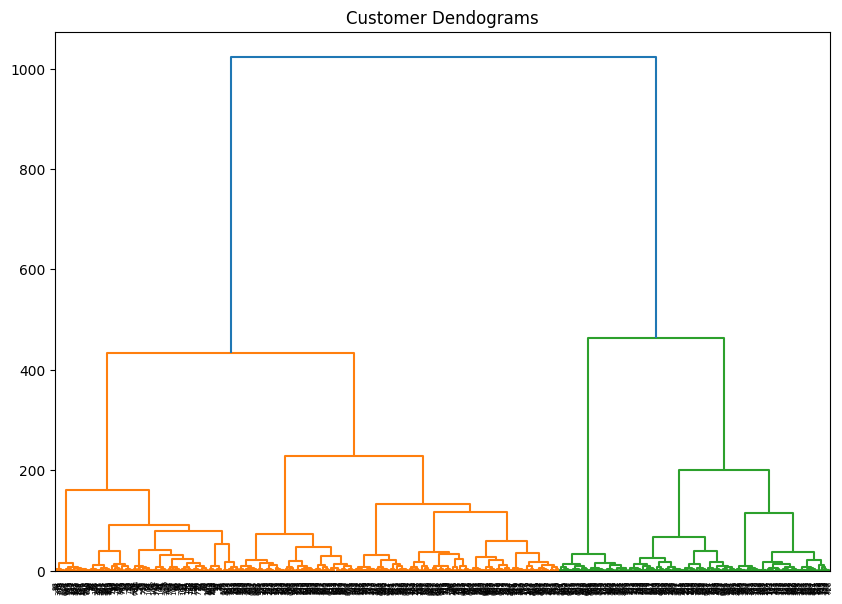

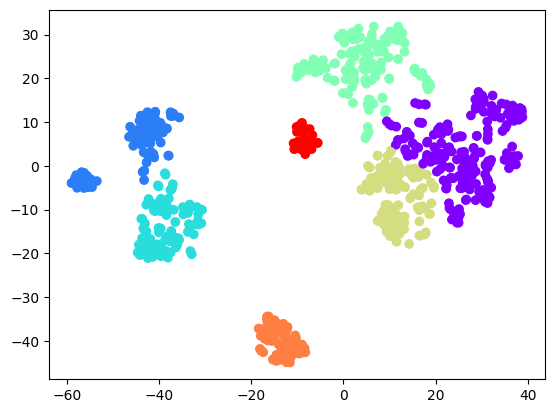

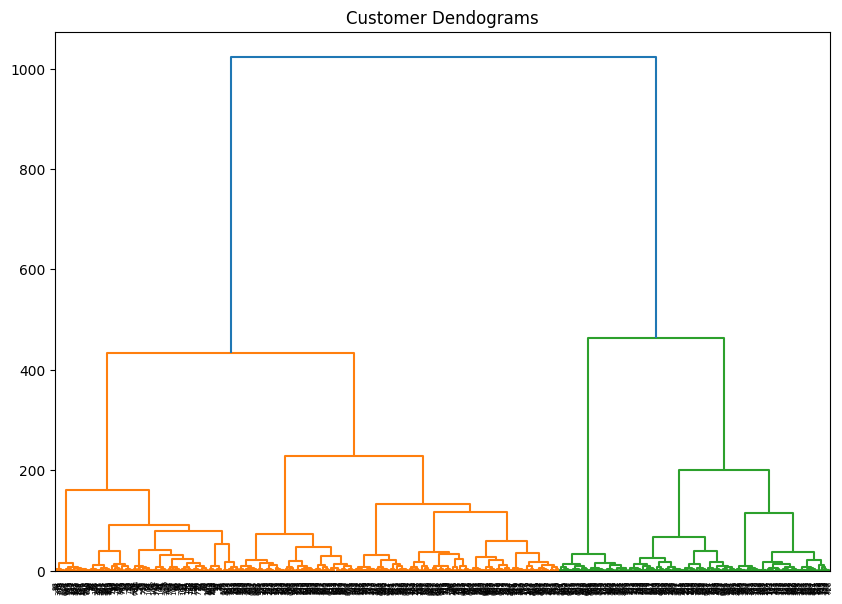

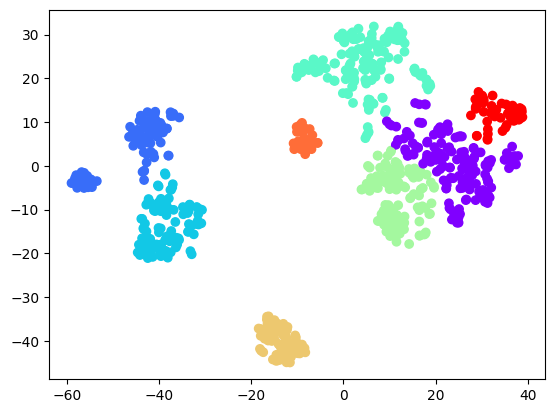

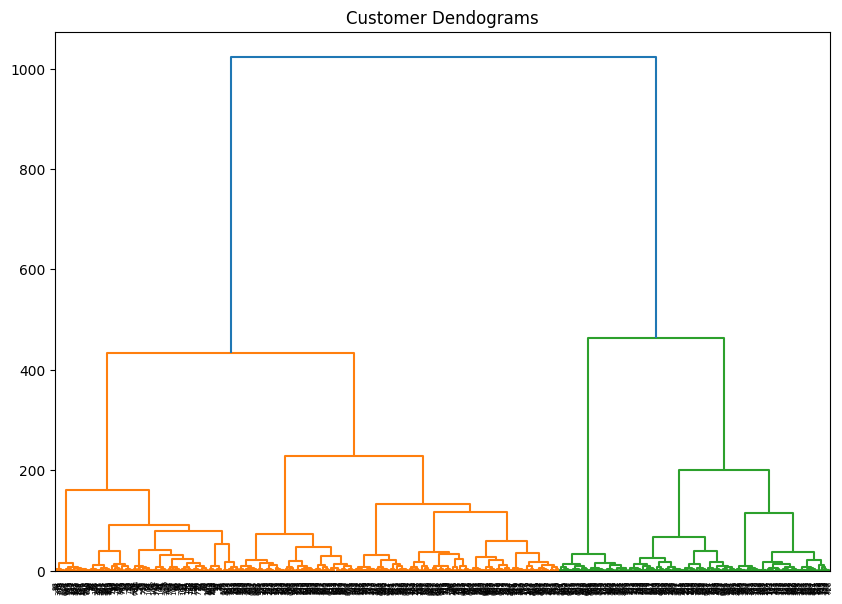

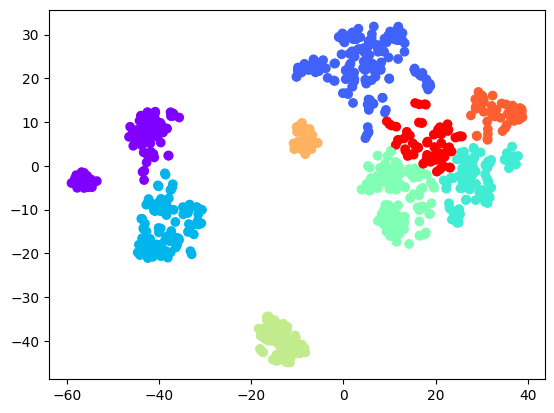

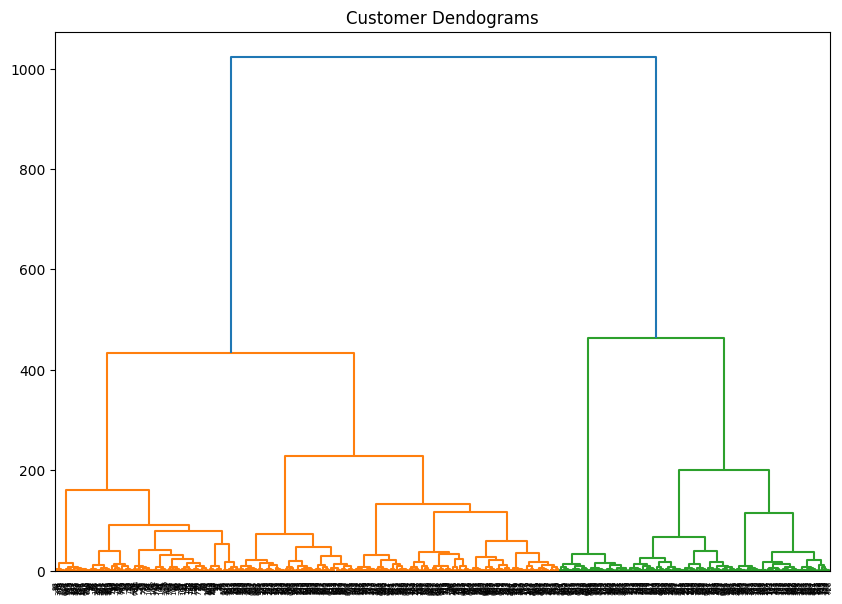

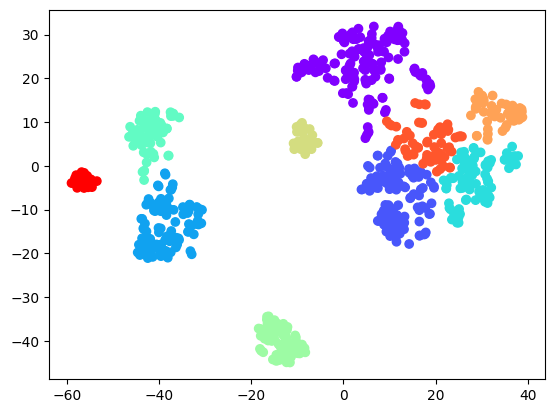

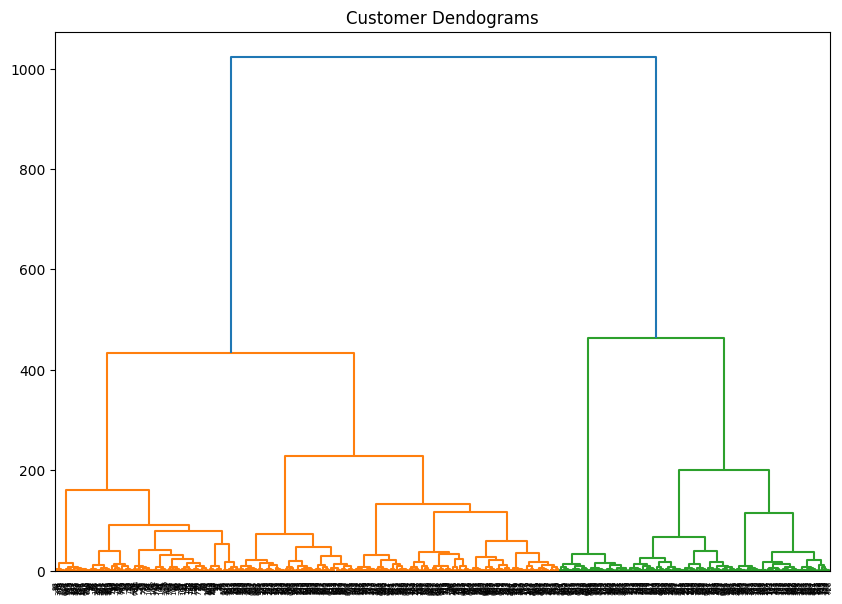

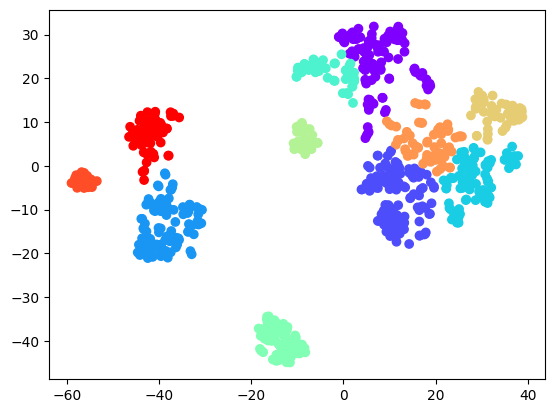

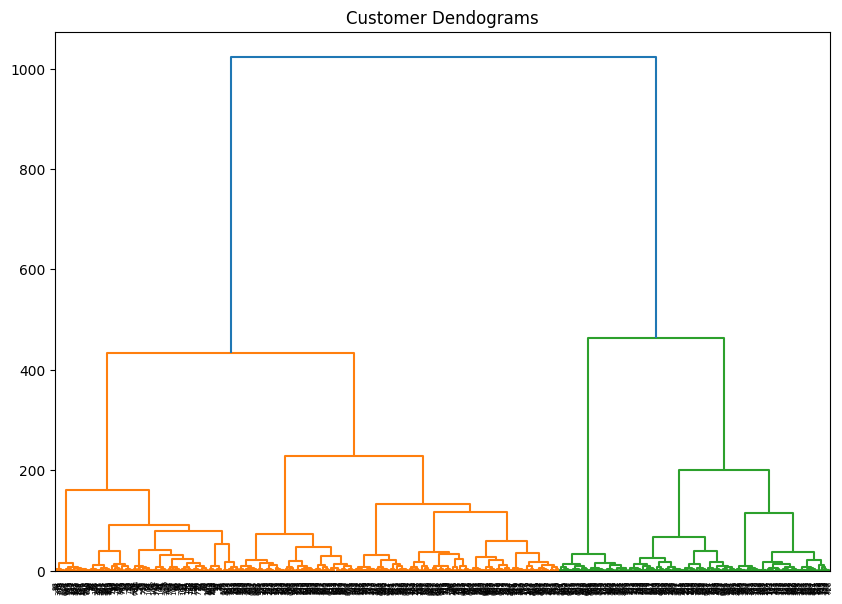

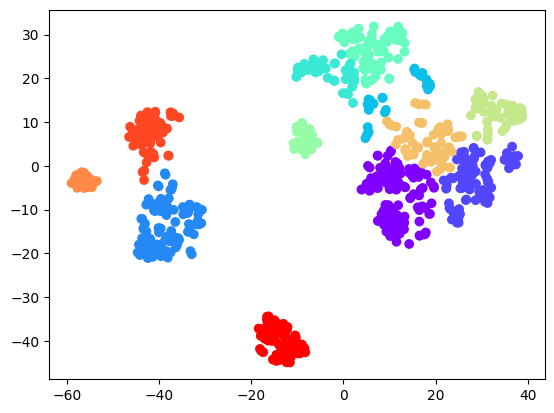

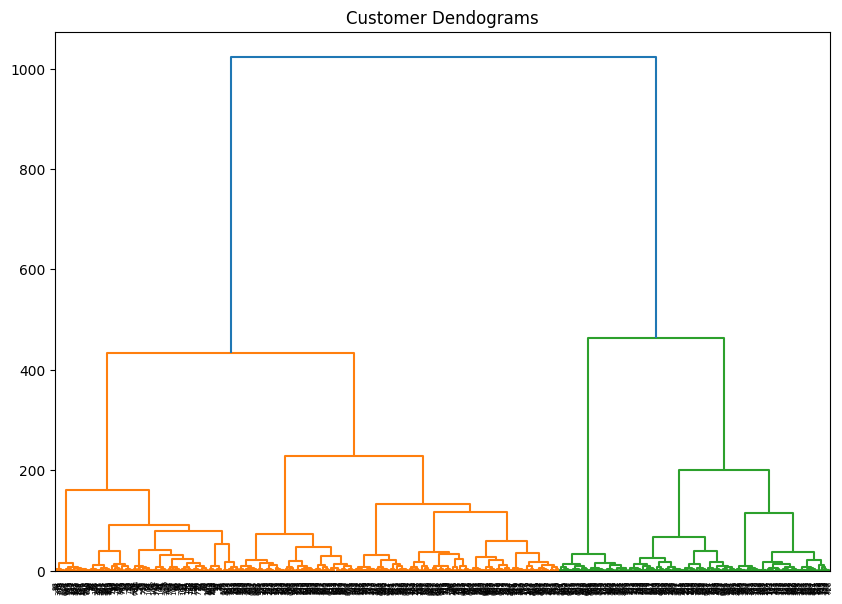

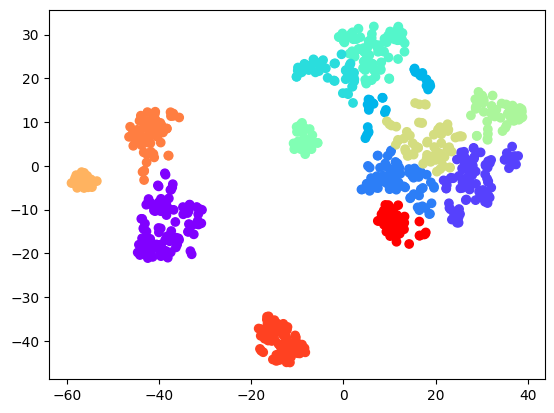

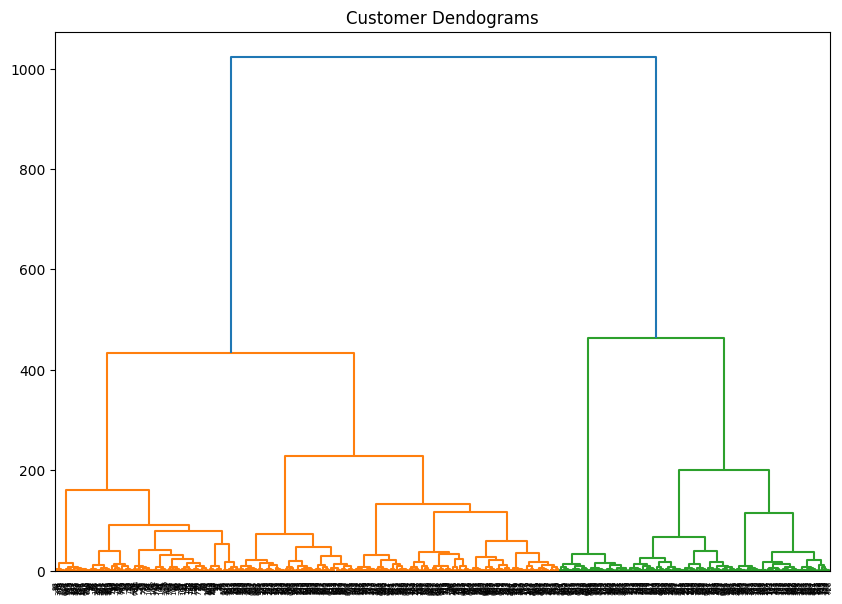

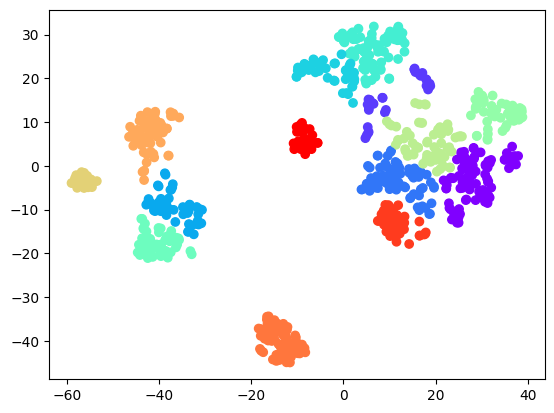

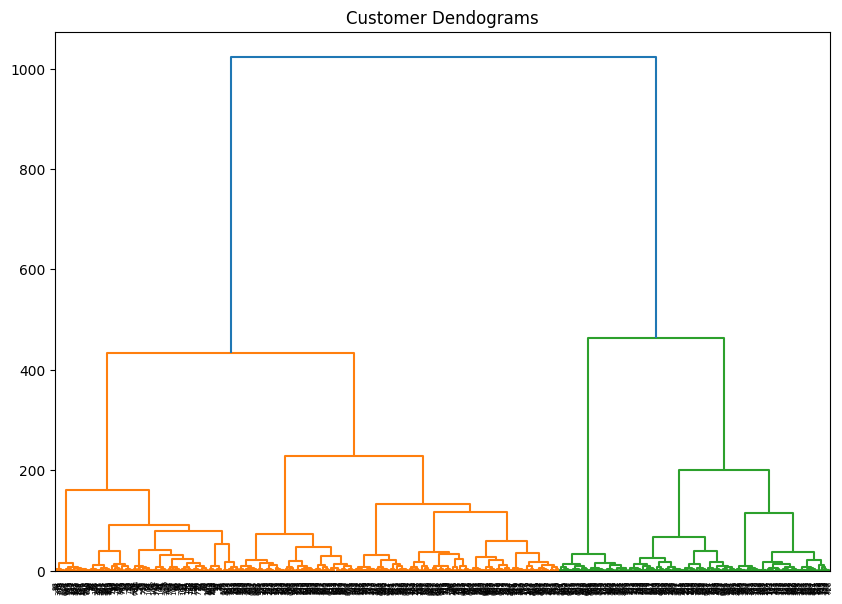

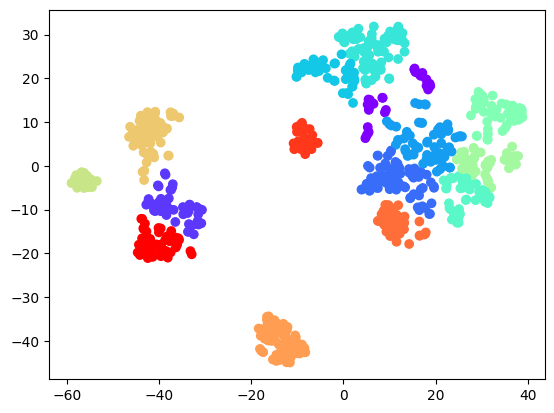

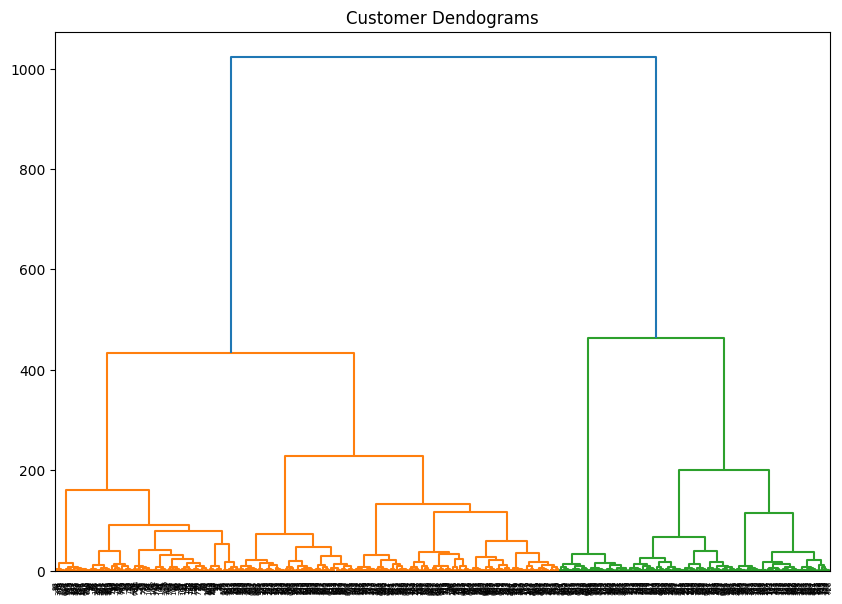

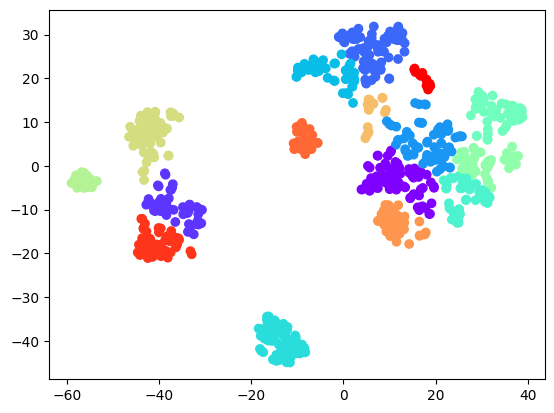

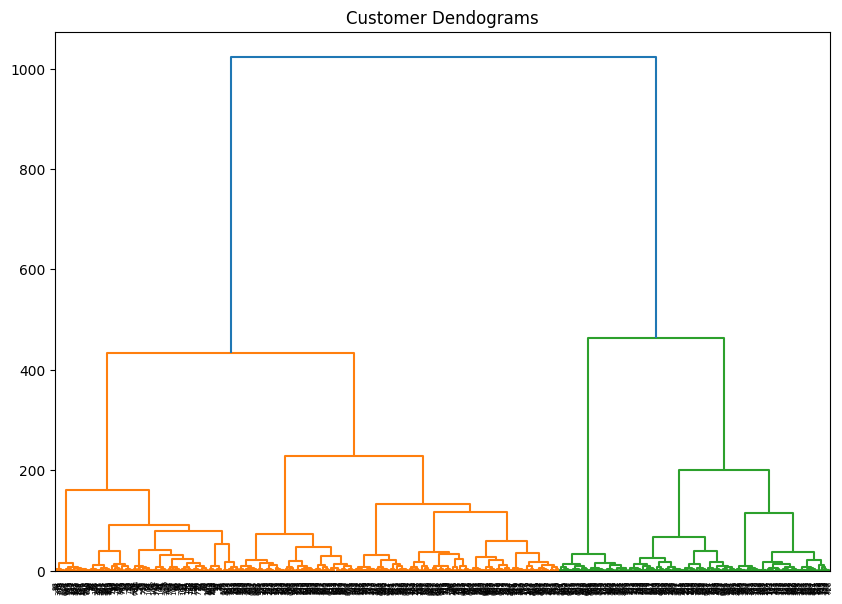

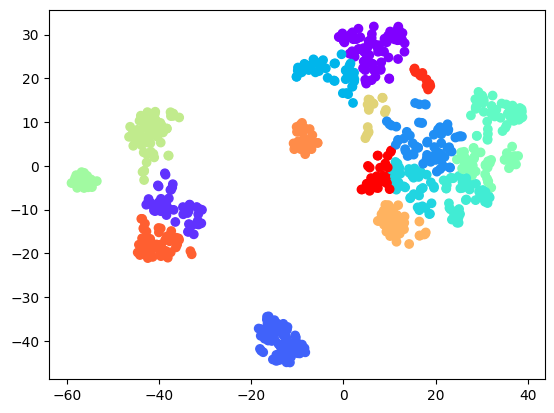

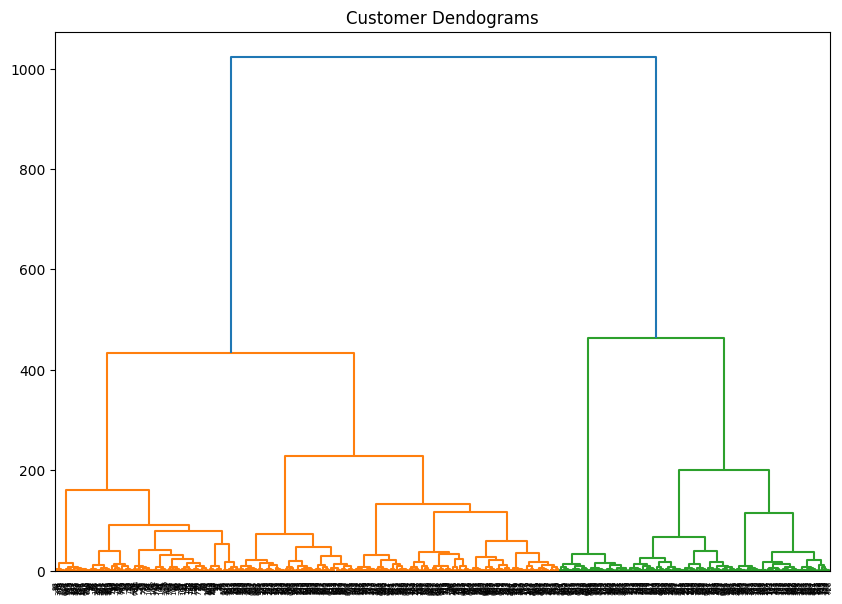

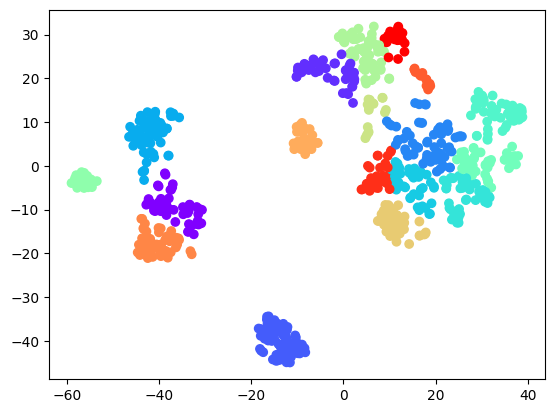

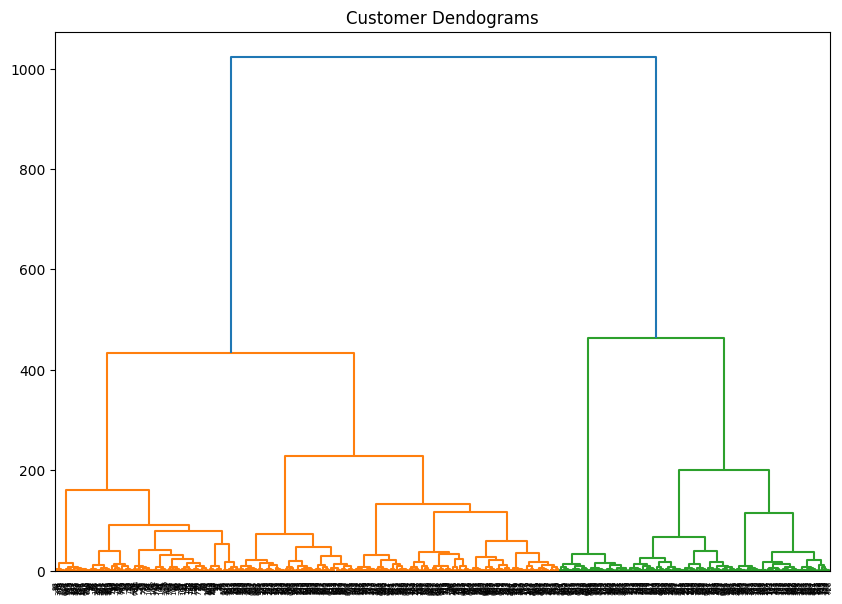

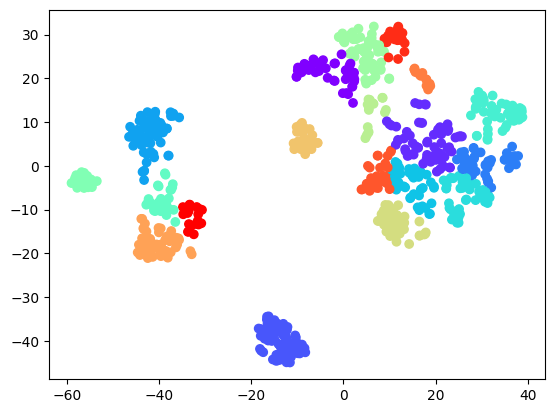

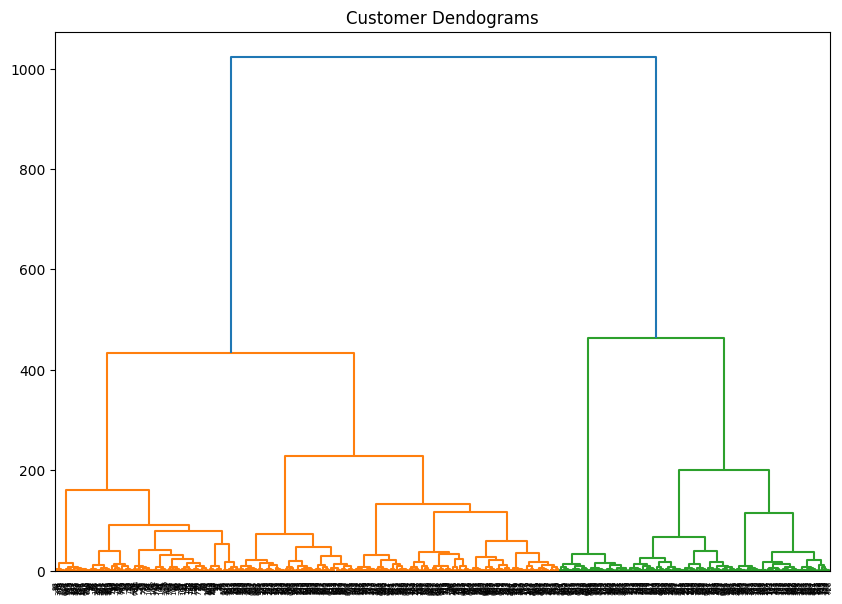

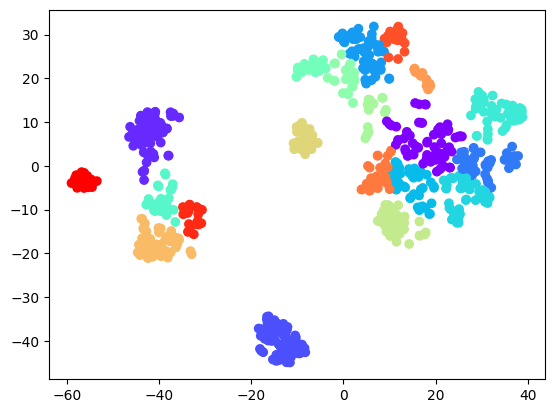

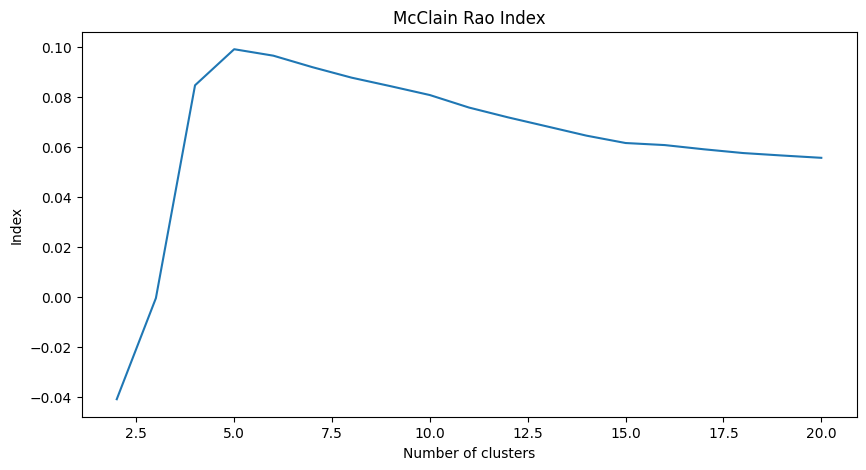

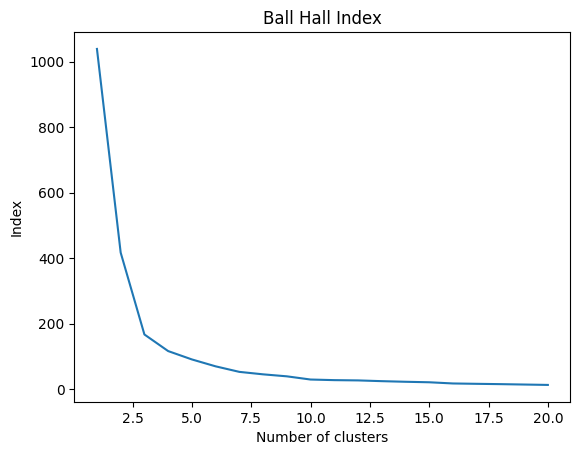

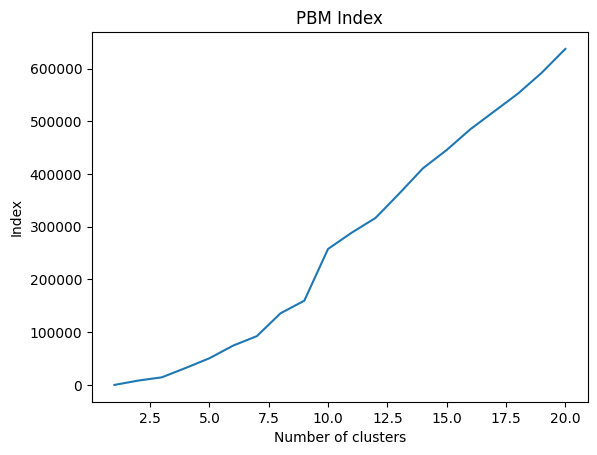

In [20]:
ks=np.linspace(1,20,20)
McClainRidx=[]
BallHallIdx=[]
PBM_idx=[]
for k in ks:
    clusters, cluster = unsp.hierarchical_clustering(data_r2_df, 'ward', 'euclidean', int(k))
    M,B,P=unsp.calcIndices(data_r2_df.values, clusters)
    McClainRidx.append(M)
    BallHallIdx.append(B)
    PBM_idx.append(P)


#Plotting the results
plt.figure(figsize=(10,5))
plt.plot(ks, McClainRidx, label='McClain Rao Index')
plt.title('McClain Rao Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()
plt.plot(ks, BallHallIdx, label='Ball Hall Index')
plt.title('Ball Hall Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()
plt.plot(ks, PBM_idx, label='PBM Index')
plt.title('PBM Index')
plt.xlabel('Number of clusters')
plt.ylabel('Index')
plt.show()

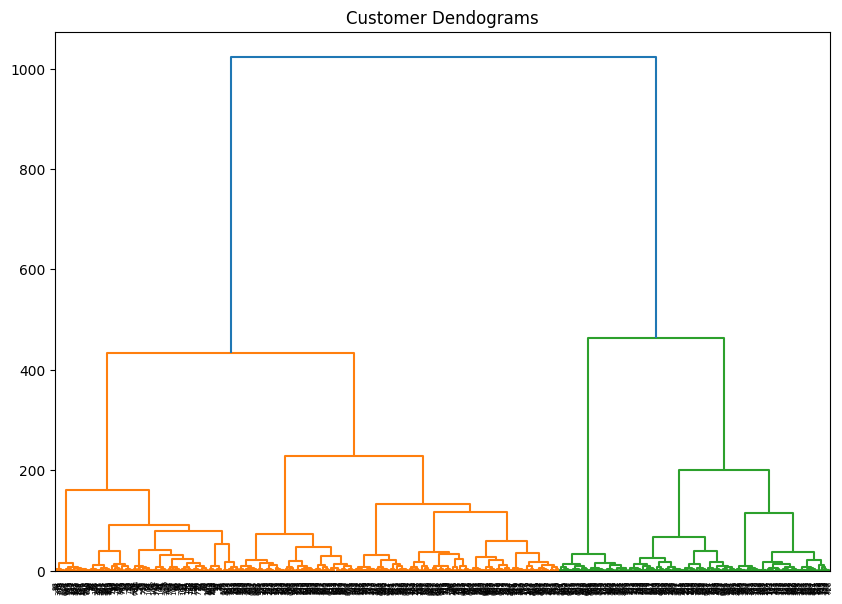

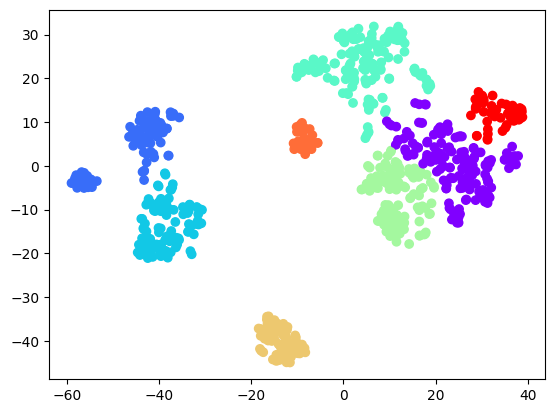

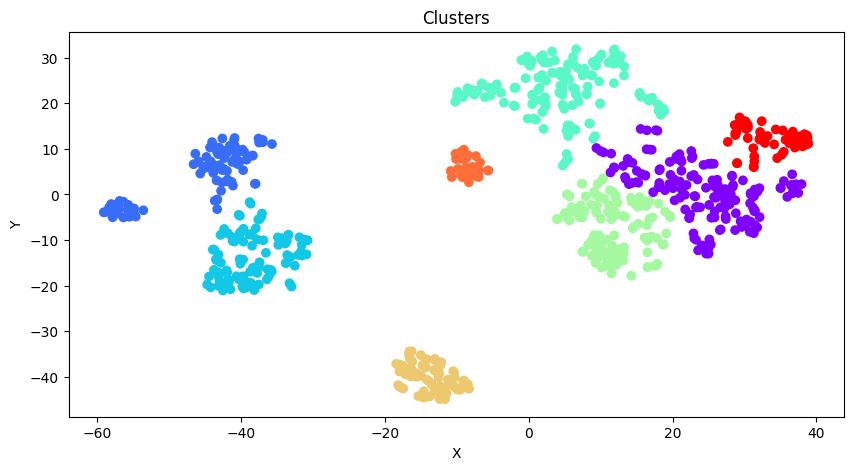

In [21]:
clusters, cluster = unsp.hierarchical_clustering(data_r2_df, 'ward', 'euclidean', 8)


#Plotting the clusters
plt.figure(figsize=(10,5))
plt.scatter(data_r2[:,0], data_r2[:,1], c=clusters, cmap='rainbow')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()